In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocesamiento
# Normalizar los valores de píxeles a [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
# Definir el modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplanar la imagen 28x28
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # 10 clases (dígitos 0-9)
])

In [4]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
# Entrenar el modelo
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

# Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nPrecisión en test: {test_acc:.4f}")

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.3262 - accuracy: 0.9044 - val_loss: 0.1582 - val_accuracy: 0.9535
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1613 - accuracy: 0.9538 - val_loss: 0.1256 - val_accuracy: 0.9648
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1181 - accuracy: 0.9647 - val_loss: 0.1032 - val_accuracy: 0.9695
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0983 - accuracy: 0.9698 - val_loss: 0.0899 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.0883 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0848 - val_accuracy: 0.9762
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9802 - val_loss: 0.0829 - val_accuracy:

1/1 [==============================] - 0s 64ms/step


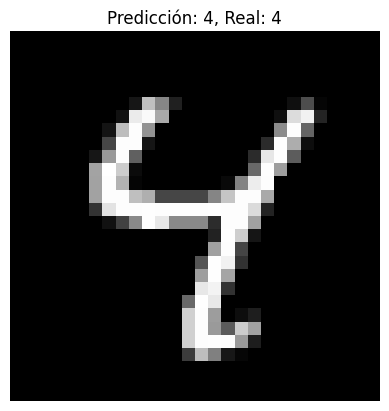

In [6]:
# Mostrar una predicción de ejemplo
def plot_prediction(index):
    plt.imshow(x_test[index], cmap='gray')
    pred = np.argmax(model.predict(x_test[index][np.newaxis, ...]))
    plt.title(f"Predicción: {pred}, Real: {y_test[index]}")
    plt.axis('off')
    plt.show()

plot_prediction(6)  # Cambiar el índice para probar imágenes